# Import Dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import sklearn as skl
import tensorflow as tf

# Import Dataset

In [2]:
# Import our input dataset
AlphabetSoup_df = pd.read_csv("charity_data.csv")
AlphabetSoup_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Data Preprocessing

In [3]:
AlphabetSoup_df.shape

(34299, 12)

In [4]:
AlphabetSoup_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

## Variable Selection: Check variable distributions. 

## Numerical Variables Standard Deviation

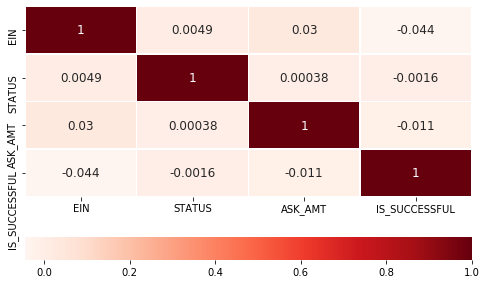

In [5]:
# Plot correlation matrix
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = 8, 5
res = sns.heatmap(AlphabetSoup_df.corr(), annot = True, linewidth=.5, cmap="Reds",annot_kws={"size":12}, cbar_kws={"orientation": "horizontal"})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 10)
plt.savefig("Corr_Matrix_Heat_Map.png")

In [6]:
# Check numerical varialbe std
AlphabetSoup_df.std(axis=0)

EIN              2.451472e+08
STATUS           1.207310e-02
ASK_AMT          8.713045e+07
IS_SUCCESSFUL    4.989560e-01
dtype: float64

In [7]:
# Print out the STATUS value counts
status_counts = AlphabetSoup_df.STATUS.value_counts()
status_counts

1    34294
0        5
Name: STATUS, dtype: int64

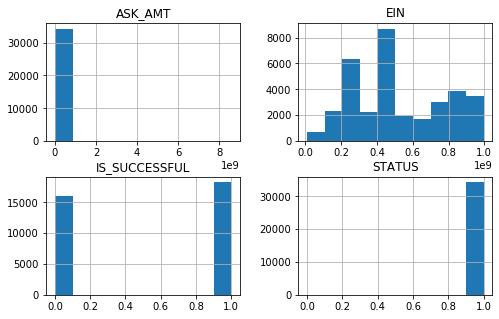

In [8]:
AlphabetSoup_df.hist()
plt.savefig("Numerical_Variables.png")

In [9]:
AlphabetSoup_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [9]:
# import numpy as np
# AlphabetSoup_df['log_AskAmt'] = np.log(AlphabetSoup_df.ASK_AMT)
# AlphabetSoup_df.head()

#### "STATUS" variation is too small. Drop it.

## Categorical Variables Distributions

In [10]:
# Generate our categorical variable list
AlphabetSoup_cat = AlphabetSoup_df.dtypes[AlphabetSoup_df.dtypes == "object"].index.tolist()
AlphabetSoup_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Print out the SPECIAL_CONSIDERATIONS  value counts
consider_counts = AlphabetSoup_df.SPECIAL_CONSIDERATIONS .value_counts()
consider_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

#### SPECIAL_CONSIDERATIONS variation is too small. Drop it.

### Bucket CLASSIFICATION

In [12]:
# Print out the Classification value counts
classification_counts = AlphabetSoup_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C4120        1
C1370        1
C1732        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

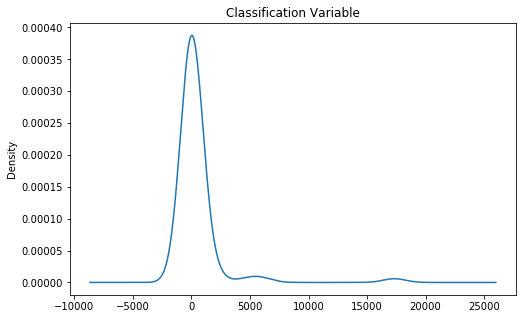

In [24]:
# Visualize the value counts
plt.figure(figsize=(8,5)) 
classification_counts.plot.density()
plt.title('Classification Variable')
plt.savefig("classification_variable.png")

In [16]:
# Determine which values to replace
replace_classifications = list(classification_counts[classification_counts < 10].index)

In [17]:
# Replace in DataFrame
for classification in replace_classifications:
    AlphabetSoup_df.CLASSIFICATION = AlphabetSoup_df.CLASSIFICATION.replace(classification,"Other")

# Check to make sure binning was successful
AlphabetSoup_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Other       98
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
Name: CLASSIFICATION, dtype: int64

### Bucket APPLICATION_TYPE

In [18]:
# Print out the application_type value counts
applicationType_counts = AlphabetSoup_df.APPLICATION_TYPE.value_counts()
applicationType_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

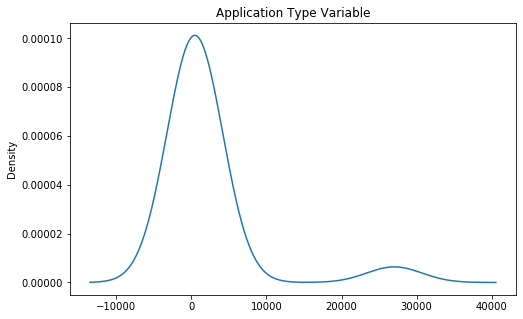

In [26]:
# Visualize the value counts
plt.figure(figsize=(8,5)) 
applicationType_counts.plot.density()
plt.title('Application Type Variable')
plt.savefig("applicationType_variable.png")

In [20]:
# Determine which values to replace
replace_applicationType = list(applicationType_counts[applicationType_counts < 10].index)
replace_applicationType

['T14', 'T25', 'T29', 'T15', 'T17']

In [21]:
# Replace in DataFrame
for applicationType in replace_applicationType:
    AlphabetSoup_df.APPLICATION_TYPE = AlphabetSoup_df.APPLICATION_TYPE.replace(applicationType,"Other")

# Check to make sure binning was successful
AlphabetSoup_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

## Drop Non-feature, low variance and low information columns

In [19]:
# DROP EID NAME and low variance columns
cleaned_df = AlphabetSoup_df.drop(["EIN","NAME",'STATUS','SPECIAL_CONSIDERATIONS'],axis=1)
cleaned_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1


## Encode categorical variables

In [20]:
# Generate our categorical variable list
cleaned_cat = cleaned_df.dtypes[cleaned_df.dtypes == "object"].index.tolist()
cleaned_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [21]:
# Check the number of unique values in each column
cleaned_df[cleaned_cat].nunique()

APPLICATION_TYPE    13
AFFILIATION          6
CLASSIFICATION      30
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

In [22]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cleaned_df[cleaned_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(cleaned_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Merge numeric and categorical dummy variables and drop original categorical variables.

In [23]:
# Merge one-hot encoded features and drop the originals
AlphabetSoup_merged_df = cleaned_df.merge(encode_df,left_index=True, right_index=True)
AlphabetSoup_merged_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,T10,Independent,C1000,ProductDev,Association,0,5000,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#AlphabetSoup_merged_df.dtypes

In [24]:
# Drop categorical columns
AlphabetSoup_merged_df = AlphabetSoup_merged_df.drop(["APPLICATION_TYPE",
                                                      "AFFILIATION",
                                                      "CLASSIFICATION",
                                                      "USE_CASE",
                                                      "ORGANIZATION",
                                                      "INCOME_AMT"],axis=1)

In [25]:
AlphabetSoup_merged_df.shape

(34299, 69)

In [26]:
AlphabetSoup_merged_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Generate X and Y variables and split train and test sets.

In [27]:
# Split our preprocessed data into our features and target arrays
y = AlphabetSoup_merged_df["IS_SUCCESSFUL"].values
X = AlphabetSoup_merged_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
AlphabetSoup_df["IS_SUCCESSFUL"].describe()

count    34299.000000
mean         0.532406
std          0.498956
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IS_SUCCESSFUL, dtype: float64

## Compile, Train and Evaluate Neural Network model.

In [49]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 138
hidden_nodes_layer2 = 20
# hidden_nodes_layer3 = 70

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 138)               9522      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                2780      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 12,323
Trainable params: 12,323
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5222 - accuracy: 0.7440
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.7443
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.7448
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.7443
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5221 - accuracy: 0.7438
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.7444
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5220 - accuracy: 0.7445
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5220 - accuracy: 0.7445
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5220 - accuracy: 0.7445
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5220 - accura

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5884 - accuracy: 0.7317
Loss: 0.5884498357772827, Accuracy: 0.7316617965698242


# Campare other models

## RandomForest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=42)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.729


In [37]:
print("Accuracy (training): {0:.3f}".format(
        rf_model.score(
            X_train_scaled,
            y_train)))
print("Accuracy (testing): {0:.3f}".format(
        rf_model.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.739
Accuracy (testing): 0.729


## GradientBoosting Tree Model

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.01,0.05, 0.1,0.5]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=80,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=8,
                                            random_state=42)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.01
Accuracy score (training): 0.731
Accuracy score (validation): 0.728

Learning rate:  0.05
Accuracy score (training): 0.740
Accuracy score (validation): 0.730

Learning rate:  0.1
Accuracy score (training): 0.746
Accuracy score (validation): 0.731

Learning rate:  0.5
Accuracy score (training): 0.762
Accuracy score (validation): 0.728



### GradientBoosting Tree model can acheive similar accuracy score to Neural Network for this dataset.

## LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.723


## SVM Model

In [38]:
from sklearn.svm import SVC

In [39]:
# Create the SVM model
svm = SVC(kernel='linear')
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [48]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.722


In [40]:
print("Accuracy (training): {0:.3f}".format(
        svm.score(
            X_train_scaled,
            y_train)))
print("Accuracy (testing): {0:.3f}".format(
        svm.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.726
Accuracy (testing): 0.722
